# Overall Aim of project: Investigate Factors that influence a Country’s GDP per capita. 

## Background & Context
GDP per capita is a measure of a country's economic output divided by its population size. It is important to measure it because it gives a good indication of a country's economic health and the standard of living of its citizens. It is also a useful tool for comparing the economic performance of different countries.

Prediction of GDP per capita is important in order to gauge the economic performance of a country over time. It can be used to help inform policy decisions and measure the effects of economic policies. By predicting future GDP per capita, policymakers can better understand the likely effects of their decisions and make more informed decisions.

As data scientists, we must come up with models that can predict GDP per capita in order to help inform policy decisions and measure the performance of economic policies. By using predictive models, data scientists can better understand the likely effects of policy decisions and provide policy makers with important insights into the economic performance of a country. These models also allow for better comparisons between countries and regions.


### **The objectives:**
* Explore and visualize the dataset.
* Build a model to predict the GDP per Capita.
* Generate a set of insights and recommendations that will help countries in their GDP forecasting and predictions.

### **The key questions:**
* Which factors would affect the GDP per Capita of a country?
* Is there any difference between the poor and rich?
* Do poor countries grow faster than rich countries? 

### **The problem formulation**:
We have a regression problem at hand where we will try to predict the GDP per capita based on several factors derived from our dataset from World Bank and IMF

### **Data**

* The World Bank Indicators data: that includes hundreds of economic and social indicators including GDP, population, inflation, labor force, energy use, poverty levels, and education. It also includes data on health, natural resources, and the environment. The data is sourced from a variety of international organizations and can be used to compare the performance of countries and regions on a variety of measures.
* The International Monetary Fund (IMF) data:  that includes economic indicators such as GDP, inflation, exchange rates, public debt, and balance of payments. It also includes data on trade, investment, and financial flows. The data can be used to measure the performance of countries and regions and compare them over time.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import altair as alt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Import libraries to build linear model for statistical analysis and prediction
# import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn import metrics

# for tuning the model
from sklearn.model_selection import GridSearchCV

# to ignore warnings
import warnings

warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)
# Import jupyter dash
from jupyter_dash import JupyterDash
import os

# Import dash
import dash
from dash import dcc
from dash import html

from dash import Dash, html, dcc, Input, Output

# Import plotly
import plotly.graph_objs as go
import plotly.express as px

C:\Users\fkiwanuka\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# enable correct rendering (unnecessary in later versions of Altair)
alt.renderers.enable('default')

# uses intermediate json files to speed things up
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
# read processed world bank data
wb_df = pd.read_csv('WB_feature_vif.csv',sep='\t')
wb_df.head()

,Unnamed: 0,ARI treatment (% of children under 5 taken to a health provider),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),Adjusted savings: mineral depletion (% of GNI),Adjusted savings: mineral depletion (current US$),Adjusted savings: net forest depletion (% of GNI),Adjusted savings: net forest depletion (current US$),Agricultural irrigated land (% of total agricultural land),"Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added per worker (constant 2015 US$)","Annual freshwater withdrawals, total (% of internal resources)","Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)","Annualized average growth rate in per capita real survey mean consumption or income, total population (%)",Antiretroviral therapy coverage (% of people living with HIV),Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV),Average time to clear exports through customs (days),Average transaction cost of sending remittances from a specific country (%),Average transaction cost of sending remittances to a specific country (%),Bank capital to assets ratio (%),Bank liquid reserves to bank assets ratio (%),Bank nonperforming loans to total gross loans (%),Battle-related deaths (number of people),Benefit incidence of social protection and labor programs to poorest quintile (% of total SPL benefits),Benefit incidence of social safety net programs to poorest quintile (% of total safety net benefits),Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits),"Borrowers from commercial banks (per 1,000 adults)",Broad money growth (annual %),Broad money to total reserves ratio,Business extent of disclosure index (0=less disclosure to 10=more disclosure),CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from manufacturing industries and construction (% of total fuel combustion),"CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)",CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion),CO2 emissions from solid fuel consumption (% of total),CPIA building human resources rating (1=low to 6=high),CPIA business regulatory environment rating (1=low to 6=high),CPIA debt policy rating (1=low to 6=high),CPIA economic management cluster average (1=low to 6=high),CPIA efficiency of revenue mobilization rating (1=low to 6=high),CPIA equity of public resource use rating (1=low to 6=high),CPIA financial sector rating (1=low to 6=high),CPIA fiscal policy rating (1=low to 6=high),CPIA gender equality rating (1=low to 6=high),CPIA macroeconomic management rating (1=low to 6=high),CPIA policies for social inclusion/equity cluster average (1=low to 6=high),CPIA policy and institutions for environmental sustainability rating (1=low to 6=high),CPIA property rights and rule-based governance rating (1=low to 6=high),CPIA public sector management and institutions cluster average (1=low to 6=high),CPIA quality of budgetary and financial management rating (1=low to 6=high),CPIA quality of public administration rating (1=low to 6=high),CPIA social protection rating (1=low to 6=high),CPIA structural policies cluster average (1=low to 6=high),CPIA trade rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)","Cause of death, by injury (% of total)","Central government debt, total (% of GDP)",Cereal yield (kg per hectare),Chemicals (% of value added in manufacturing),Children wit

In [4]:
#IMF data is so massive in size, we will try to read only columns that are relevant
#cols = ['Country Name', 'Indicator Name', 'Year', 'Feature Value']
imf_df = pd.read_csv('feature_yearly_data_2023-04-04.csv')
imf_df.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,Year,Feature Value,filename
0,0,Venezuela,299,"Financial account, Net lending (+) / net borro...",BFDL_BP6_USD,2005,2.450000e+09,BOPAGG
1,1,Venezuela,299,"Financial account, Net lending (+) / net borro...",BFDL_BP6_USD,2006,1.980000e+08,BOPAGG
2,2,Venezuela,299,"Financial account, Net lending (+) / net borro...",BFDL_BP6_USD,2007,4.358000e+09,BOPAGG
3,3,Venezuela,299,"Financial account, Net lending (+) / net borro...",BFDL_BP6_USD,2008,2.083000e+09,BOPAGG
4,4,Venezuela,299,"Financial account, Net lending (+) / net borro...",BFDL_BP6_USD,2009,-1.137000e+09,BOPAGG


In [5]:
# Load features generated following multicollinearity test offline due to computational burden limit to VIF < =5
vif_features_df = pd.read_csv('vif_train_model_df_2020_2023-04-04.csv')
features_list = vif_features_df[vif_features_df['VIF'] <= 5]['features'].tolist()
len(features_list)

202

In [6]:
# transform imf data into long form to match world bank dataframe
def transform_imf(df,cutoff_year):
    filtered_df = df[df['Indicator Code'].isin(features_list)]
    #filtered_df['Year'] = filtered_df['Year'].astype(int)
    df_melt = filtered_df[filtered_df['Year']>=cutoff_year]
    #df_melt['Year'] = df_melt['Year'].astype(str)
    df_melt = df_melt.pivot_table(index=['Country Name', 'Year'],
                      columns='Indicator Name', values='Feature Value', aggfunc=np.sum).reset_index()
    perc = 75.0 # Here N is 75
    min_count =  int(((100-perc)/100)*df_melt.shape[1] + 1)
    df_melt = df_melt.dropna( axis=0, thresh=min_count)
    
    df_melt = df_melt.groupby(['Country Name']).apply(lambda x : x.bfill().ffill()).reset_index()
    df_melt = df_melt.fillna(0)
    df_melt= df_melt.drop('index', axis = 1)

    return df_melt
imf_transformed_df = transform_imf(imf_df,2000)
imf_transformed_df.head()

Indicator Name,Country Name,Year,Actual employers’ social contributions_Extrabudgetary central government_Percent of GDP,Compensation of employees_General government_Percent of GDP,Consumption of fixed capital_Budgetary central government_Percent of GDP,Customs & other import duties_Extrabudgetary central government_Percent of GDP,Customs & other import duties_General government_Percent of GDP,D2 debt liabilities at market value _Extrabudgetary central government_Percent of GDP,D3 debt liabilities at market value _Extrabudgetary central government_Percent of GDP,Dividend expense_Budgetary central government_Percent of GDP,Dividend expense_Central government (excl. social security funds)_Percent of GDP,Dividend expense_Central government (incl. social security funds)_Percent of GDP,Dividend expense_General government_Percent of GDP,Employers' social contributions_Extrabudgetary central government_Percent of GDP,Expenditure (% of GDP),Expenditure on civil defense_Budgetary central government_Percent of GDP,Expenditure on civil defense_Central government (excl. social security funds)_Percent of GDP,Expenditure on civil defense_Central government (incl. social security funds)_Percent of GDP,Expenditure on civil defense_General government_Percent of GDP,Expenditure on communication_Budgetary central government_Percent of GDP,Expenditure on communication_Central government (excl. social security funds)_Percent of GDP,Expenditure on communication_Central government (incl. social security funds)_Percent of GDP,Expenditure on communication_General government_Percent of GDP,Expenditure on community development_Budgetary central government_Percent of GDP,Expenditure on community development_Central government (excl. social security funds)_Percent of GDP,Expenditure on community development_Central government (incl. social security funds)_Percent of GDP,Expenditure on community development_General government_Percent of GDP,Expenditure on education n.e.c._Budgetary central government_Percent of GDP,Expenditure on education n.e.c._Central government (excl. social security funds)_Percent of GDP,Expenditure on education n.e.c._Central government (incl. social security funds)_Percent of GDP,Expenditure on education n.e.c._General government_Percent of GDP,Expenditure on education not definable by level_Budgetary central government_Percent of GDP,Expenditure on education not definable by level_Central government (excl. social security funds)_Percent of GDP,Expenditure on education not definable by level_Central government (incl. social security funds)_Percent of GDP,Expenditure on education not definable by level_General government_Percent of GDP,Expenditure on environment protection_Central government (excl. social security funds)_Percent of GDP,Expenditure on environmental protection n.e.c._Budgetary central government_Percent of GDP,Expenditure on environmental protection n.e.c._Central government (excl. social security funds)_Percent of GDP,Expenditure on environmental protection n.e.c._Central government (incl. social security funds)_Percent of GDP,Expenditure on environmental protection n.e.c._General government_Percent of GDP,"Expenditure on exec/leg, fiscal, & external affairs_Budgetary central government_Percent of GDP","Expenditure on exec/leg, fiscal, & external affairs_Central government (excl. social security funds)_Percent of GDP","Expenditure on exec/leg, fiscal, & external affairs_Central government (incl. social security funds)_Percent of GDP","Expenditure on exec/leg, fiscal, & external affairs_General government_Percent of GDP",Expenditure on fuel & energy_Central government (excl. social security funds)_Percent of GDP,Expenditure on fuel & energy_Central government (incl. social security funds)_Percent of GDP,Expenditure on fuel & energy_General government_Percent of GDP,Expenditure on general services_Budgetary central government_Percent of GDP,Expenditure on general services_Central government (excl. social security funds)

In [7]:
print("The shape of processed world bank data is :",wb_df.shape)
print("The shape of processed imf data is :",imf_transformed_df.shape)

The shape of processed world bank data is : (5258, 305)
The shape of processed imf data is : (1671, 200)


In [8]:
print("The countries of processed world bank data is :",wb_df['Country Name'].nunique())
print("The countries of processed imf data is :",imf_transformed_df['Country Name'].nunique())

The countries of processed world bank data is : 239
The countries of processed imf data is : 114


In [9]:
#combine dataframe of imf and wb
combined_df = pd.merge(imf_transformed_df,wb_df,on= ['Country Name', 'Year'], how ='left')
#combined_df = combined_df.fillna(0)
combined_df.shape

(1671, 503)

In [10]:
# check for number of missing values and removes rows with more than 50% missing values then apply bfill and ffill
#combined_df.isnull().sum()
def clean_out_more_missing_vals(df):
    df['Year'] = df['Year'].astype(str)
    perc = 50.0 # Here N is 75
    min_count =  int(((100-perc)/100)*df.shape[1] + 1)
    df = df.dropna( axis=0, thresh=min_count)
    df = df.groupby(['Country Name']).apply(lambda x : x.bfill().ffill()).reset_index()
    df= df.drop('index', axis = 1)
    return df

df_data =clean_out_more_missing_vals(combined_df)
df_data.shape

(1539, 503)

In [11]:
# Need to filter out string columns
print(df_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Columns: 503 entries, Country Name to GDP per capita (current US$)
dtypes: float64(501), object(2)
memory usage: 5.9+ MB
None


In [12]:
#select subset of GDP 
#df_data = df_data[df_data["GDP per capita (current US$)"] <50000]

In [13]:
df_data['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Barbados',
       'Belarus', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia',
       'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'El Salvador',
       'Estonia', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Guatemala', 'Honduras', 'Hungary', 'Iceland',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyz Republic',
       'Latvia', 'Lesotho', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Maldives', 'Malta', 'Marshall Islands', 'Mauritius', 'Mexico',
       'Moldova', 'Mongolia', 'Morocco', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Norway', 'Palau', 'Paraguay',
       'Peru', 'Poland', 'Portugal', 'Roma

In [14]:
vis_df = pd.melt(df_data, id_vars=['Country Name', 'Year'],\
                 value_vars=df_data.drop(['Country Name', 'Year'],axis = 1).columns)
vis_df.rename(columns = {'variable':'Indicator Name'}, inplace = True)
#This function creates an interactive plot from our dataframe
def generateLineChart(changeDF):
    # input: changeDF -- the data frame, formatted as changedata above
    # return: an altar chart as described above
    # select a point for which to provide details-on-demand
    metricOptions = changeDF['Indicator Name'].unique().tolist()
    #input_dropdown = metricOptions
    input_dropdown = alt.binding_select(options=metricOptions)
    selection = alt.selection_single(name='Select Indicator', fields=['Indicator Name'],
                                       bind=input_dropdown, init={'Indicator Name':metricOptions[-1]})

    # color = alt.condition(select_state,
    #                       alt.Color('Type:N', legend=None),
    #                       alt.value('lightgray'))

    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=['Year'], empty='none')

    # The basic line
    base = alt.Chart(changeDF).encode(
        y = 'value:Q',
        x = 'Year:N',
        color = 'Country Name:N'
    ).transform_filter(
        selection
    )

    # add drop-down menu
    lines = base.mark_line(interpolate='basis').add_selection(selection
    )

    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = alt.Chart(changeDF).mark_point().encode(
        x='Year:N',
        opacity=alt.value(0),
    ).add_selection(
        nearest
    )

    # Draw points on the line, and highlight based on selection
    points = base.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )

    # Draw text labels near the points, and highlight based on selection
    text = base.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, 'value:Q', alt.value(' '))
    )

    # Draw a rule at the location of the selection
    rules = alt.Chart(changeDF).mark_rule(color='gray').encode(
        x='Year:N',
    ).transform_filter(
        nearest
    )

    #Put the five layers into a chart and bind the data
    final_result = alt.layer(
        lines, selectors, points, rules, text
    ).properties(
        width=600, height=400
    )

    
    return final_result

# Create a new dataframe that uses the get_country function and a list of countries of intreset 
# with their respective values and indicators: this function takes our raw wdidata, and a list of
# countries of interest and a keyword
def subSet_country_to_view(raw_df, list_of_countries):
    df = raw_df[raw_df['Country Name'].isin(list_of_countries)]
    return df
# create the dataframe to be used for visualization
# dataframe = get_merged_countries_df(df_data, ['Uganda', 'Kenya', 'Brazil'], 'education')
# dataframe.sample(5)
generateLineChart(subSet_country_to_view(vis_df, ['South Africa', 'Spain', 'Brazil', 'Italy', 'Uruguay','Jordan']))

alt.LayerChart(...)

In [15]:
#countries_all_data= df_data[df_data["GDP per capita (current US$)"] < 50000]
countries_all_data = df_data.copy()
#countries_all_data['Year'] = countries_all_data['Year'].astype(str)

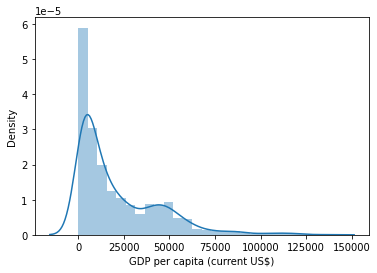

In [16]:
# Density plot of GDP pre capita
sns.distplot(countries_all_data["GDP per capita (current US$)"]);

This is a highly skewed distribution. Let us use log transformation on this column to see of that helps normalise the distribution.

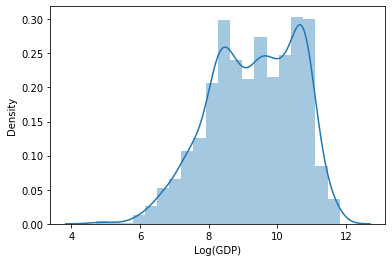

In [17]:
# Let us normalize GDP per capita
sns.distplot(np.log(countries_all_data["GDP per capita (current US$)"]), axlabel="Log(GDP)");

In [18]:
# Log Transformation has definitely helped in reducing the skew
# Creating a new column with the transformed variable.
countries_all_data["GDP_log"] = np.log(countries_all_data["GDP per capita (current US$)"])

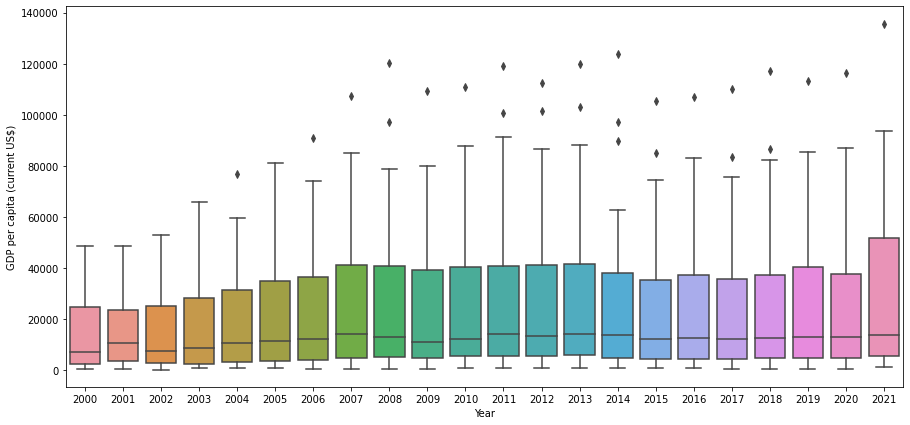

In [19]:
#GDP over the years
plt.figure(figsize=(15, 7))
sns.boxplot(x="Year", y="GDP per capita (current US$)", data=countries_all_data.sort_values('Year',ascending = True));

GDP per capita has a large IQR in the year 2021.

In [20]:
# Drop the redundant columns.
#countries_all_data.drop(columns=["GDP per capita (current US$)"], inplace=True)

In [21]:
# Drop the rows where 'GDP' == NaN and proceed to modelling
countries_all_data = countries_all_data[countries_all_data["GDP_log"].notna()]

## **Proposed approach**

**Potential techniques** :

Since it is a regression problem we will first start with the parametric model - linear regression,Ridge Regression followed by the non-parametric models - Decision Tree and Random Forest.

**Overall solution design** : 

The potential solution design would look like:
* Checking the data description to get the idea of basic statistics or summary of data.
* Univariate analysis to see how data is spread out, getting to about the outliers.
* Bivariate analysis to see how different attributes vary with the dependent variable.
* Outlier treatment if needed - In this case, outlier treatment is not necessary as outliers are the rich countries and we would want our predictive model to capture the underlying pattern for them.
* Missing value treatment using appropriate techniques.
* Feature engineering - transforming features, creating new features if possible.
* Choosing the model evaluation technique - 1) R Squared 2) RMSE , can be any other metrics related to regression analysis.
* Splitting the data and proceeding with modelling.
* Model tuning to see if the performance of the model can be improved further.

**Measures of success** :

R-squared and RMSE can be used as a measure of success.

R-squared: This will tell us how much variation our predictive model can explain in data.

RMSE: This will give us a measure of how far off the model is predicting the original values on average.

### Model Building

1. What we want to predict is the "GDP per Capita". We will use the normalized version 'GDP per capita' for modelling.
2. We are luck there are no categorical features for encoding.  
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

In [22]:
# shuffle the DataFrame rows
countries_all_data = countries_all_data.sample(frac = 1)
# define independent and dependent variables
ind_vars = countries_all_data.drop(["GDP per capita (current US$)","GDP_log", 'Country Name','Year' ], axis=1)
dep_var = countries_all_data[["GDP per capita (current US$)", "GDP_log"]]

In [23]:
ind_vars = ind_vars.iloc[:,1:].bfill().ffill()
ind_vars = ind_vars.fillna(0)
ind_vars.head()

,Compensation of employees_General government_Percent of GDP,Consumption of fixed capital_Budgetary central government_Percent of GDP,Customs & other import duties_Extrabudgetary central government_Percent of GDP,Customs & other import duties_General government_Percent of GDP,D2 debt liabilities at market value _Extrabudgetary central government_Percent of GDP,D3 debt liabilities at market value _Extrabudgetary central government_Percent of GDP,Dividend expense_Budgetary central government_Percent of GDP,Dividend expense_Central government (excl. social security funds)_Percent of GDP,Dividend expense_Central government (incl. social security funds)_Percent of GDP,Dividend expense_General government_Percent of GDP,Employers' social contributions_Extrabudgetary central government_Percent of GDP,Expenditure (% of GDP),Expenditure on civil defense_Budgetary central government_Percent of GDP,Expenditure on civil defense_Central government (excl. social security funds)_Percent of GDP,Expenditure on civil defense_Central government (incl. social security funds)_Percent of GDP,Expenditure on civil defense_General government_Percent of GDP,Expenditure on communication_Budgetary central government_Percent of GDP,Expenditure on communication_Central government (excl. social security funds)_Percent of GDP,Expenditure on communication_Central government (incl. social security funds)_Percent of GDP,Expenditure on communication_General government_Percent of GDP,Expenditure on community development_Budgetary central government_Percent of GDP,Expenditure on community development_Central government (excl. social security funds)_Percent of GDP,Expenditure on community development_Central government (incl. social security funds)_Percent of GDP,Expenditure on community development_General government_Percent of GDP,Expenditure on education n.e.c._Budgetary central government_Percent of GDP,Expenditure on education n.e.c._Central government (excl. social security funds)_Percent of GDP,Expenditure on education n.e.c._Central government (incl. social security funds)_Percent of GDP,Expenditure on education n.e.c._General government_Percent of GDP,Expenditure on education not definable by level_Budgetary central government_Percent of GDP,Expenditure on education not definable by level_Central government (excl. social security funds)_Percent of GDP,Expenditure on education not definable by level_Central government (incl. social security funds)_Percent of GDP,Expenditure on education not definable by level_General government_Percent of GDP,Expenditure on environment protection_Central government (excl. social security funds)_Percent of GDP,Expenditure on environmental protection n.e.c._Budgetary central government_Percent of GDP,Expenditure on environmental protection n.e.c._Central government (excl. social security funds)_Percent of GDP,Expenditure on environmental protection n.e.c._Central government (incl. social security funds)_Percent of GDP,Expenditure on environmental protection n.e.c._General government_Percent of GDP,"Expenditure on exec/leg, fiscal, & external affairs_Budgetary central government_Percent of GDP","Expenditure on exec/leg, fiscal, & external affairs_Central government (excl. social security funds)_Percent of GDP","Expenditure on exec/leg, fiscal, & external affairs_Central government (incl. social security funds)_Percent of GDP","Expenditure on exec/leg, fiscal, & external affairs_General government_Percent of GDP",Expenditure on fuel & energy_Central government (excl. social security funds)_Percent of GDP,Expenditure on fuel & energy_Central government (incl. social security funds)_Percent of GDP,Expenditure on fuel & energy_General government_Percent of GDP,Expenditure on general services_Budgetary central government_Percent of GDP,Expenditure on general services_Central government (excl. social security funds)_Percent of GDP,Expenditure on general services_Central government (incl. social security funds)_Percent of GDP,Expendit

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size=0.2, random_state=1
)

In [25]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 1231
Number of rows in train data = 308


In [26]:
#Fitting a linear model - Linear Regression
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(x_train)
# Add constant to test data
x_test = sm.add_constant(x_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train['GDP_log'], train)
    return olsmodel.fit()


olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                GDP_log   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     165.1
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:38:49   Log-Likelihood:                 246.94
No. Observations:                1231   AIC:                            -3.875
Df Residuals:                     986   BIC:                             1249.
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                       coef    std err          t      P>|t|      

* Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in price of used cars for upto 97% 
* The model is not an underfitting model.
* To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.
* Before we move on to assumption testing, we'll do a quick performance check on the test data.

In [27]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(model, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = model.predict(x_train)
    try:
        y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    except OverflowError:
        y_pred_train_Price = float('inf')
    y_train_Price = y_train["GDP per capita (current US$)"]

    # Prediction on test data
    y_pred_test_pricelog = model.predict(x_test)
    try:
        y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    except OverflowError:
        y_pred_test_Price = float('inf')
    y_test_Price = y_test["GDP per capita (current US$)"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, x_train, x_test)  # High Overfitting.

    Data          RMSE          MAE       MAPE
0  Train   6008.630324  3218.009671  15.714595
1   Test  10871.530160  5729.326300  28.494475


* Root Mean Squared Error of train and test data is starkly different, indicating that our model is overfitting the train data. 
* Mean Absolute Error indicates that our current model is overfitting as well
* Mean Absolute Percentage Error is ~70% on the test data.

## Checking the Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedasticity
4. Linearity of variables
5. Normality of error terms

### Checking Assumption 1: No Multicollinearity 

We will use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [29]:
vif_dicts= checking_vif(x_train)

In [30]:
# Sort and consider only features with VIF 5 or less
vif_dicts.sort_values('VIF', ascending = True).head(10)

,feature,VIF
398,"Net official flows from UN agencies, UNWTO (cu...",4.257852e-28
209,"Agriculture, forestry, and fishing, value adde...",1.840675e+00
6,Dividend expense_Budgetary central government_...,1.853640e+00
93,Grants revenue from other gen govt: current_Ge...,1.895178e+00
459,S&P Global Equity Indices (annual % change),1.912958e+00
386,"Net financial flows, IBRD (NFL, current US$)",1.916795e+00
315,"Foreign direct investment, net (BoP, current US$)",2.162609e+00
391,"Net financial flows, others (NFL, current US$)",2.200642e+00
338,"IFC, private nonguaranteed (NFL, current US$)",2.216031e+00
418,"PPG, commercial banks (NFL, current US$)",2.247675e+00


In [31]:
# get list of columns 
ind_vars_cols = vif_dicts[vif_dicts['VIF'] < 5]['feature'].tolist()

print(len(ind_vars_cols))


117


Let us check out a sample about their correlations

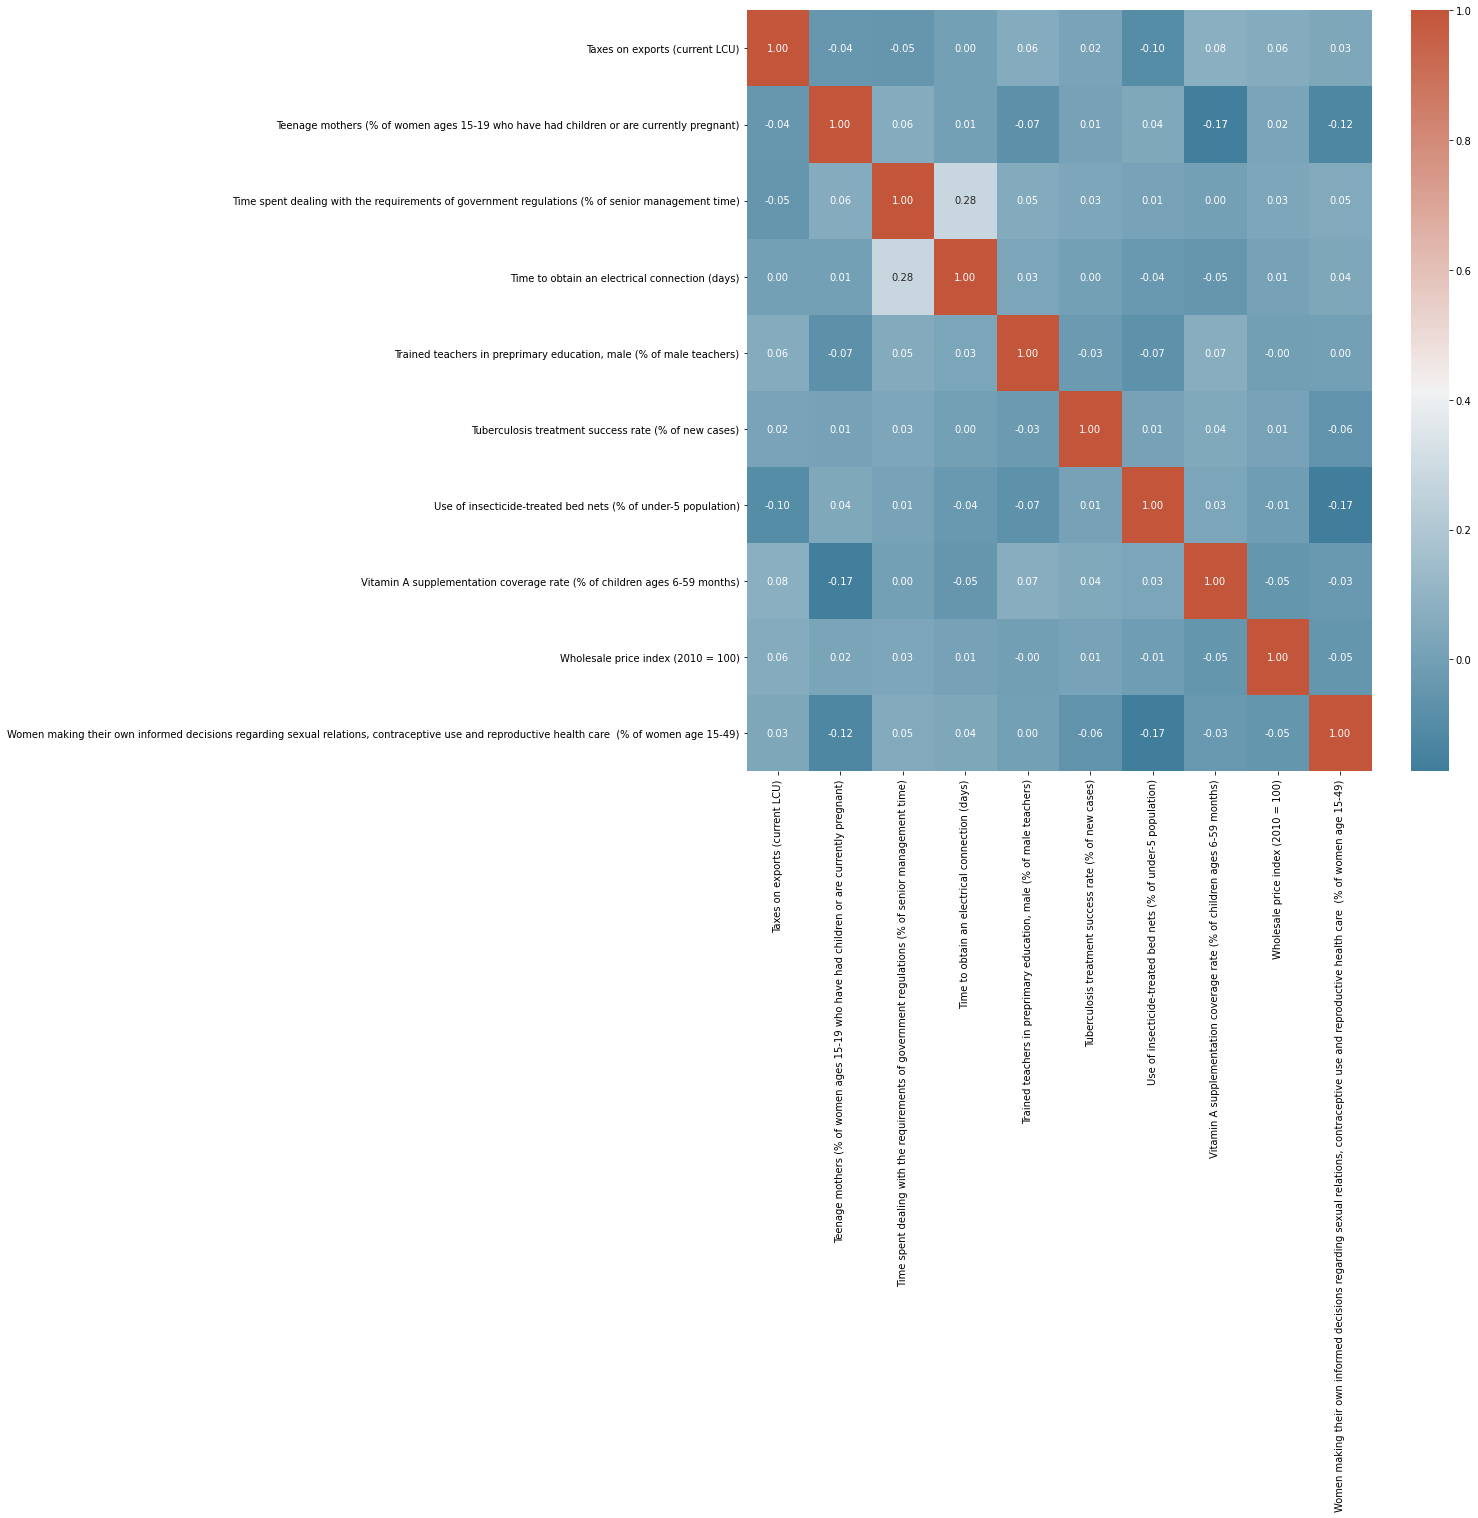

In [32]:
#Sample of feature correlation
plt.figure(figsize=(14,14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(x_train[ind_vars_cols[-10:]].corr(),annot=True,fmt='.2f',cmap=cmap )
plt.show()

### Removing Multicollinearity
 * To remove multicollinearity
  1. Drop every column that has VIF score greater than 5, one by one.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 3

In [33]:
# Method to drop all the multicollinear column and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        olsres = build_ols_model(train)
        # Adj R-Sq
        adj_rsq_scores.append(olsres.rsquared_adj)
        # RMSE (Test data)
        y_pred_test_pricelog = olsres.predict(test)
        y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
        y_test_Price = y_test["GDP_log"]
        rmse_test_data.append(rmse(y_pred_test_Price, y_test_Price))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)
    print("\n\n")


In [34]:
#Let's look at the model with the data that does not have multicollinearity
# Fit linear model on new dataset
olsmodel3 = build_ols_model(x_train[ind_vars_cols])
print(olsmodel3.summary())

print("\n\n")

# Checking model performance
model_pref(olsmodel3, x_train[ind_vars_cols], x_test[ind_vars_cols])

                            OLS Regression Results                            
Dep. Variable:                GDP_log   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     24.30
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          1.77e-218
Time:                        09:42:58   Log-Likelihood:                -1340.4
No. Observations:                1231   AIC:                             2885.
Df Residuals:                    1129   BIC:                             3407.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                               coef    std err          t      P>|t|      [0.025  

Model R-squared and Adjusted R squared has reduced as compared to the previous model - olsmodel1.
Removal of multicollinear variable has not causes any information loss in the model but has also helped us to get rid of overfitting.

Before we can make inferences from this model, let us ensure that other model assumptions are followed.

### Checking Assumption 2: Mean of residuals should be 0

In [35]:
residuals = olsmodel3.resid
np.mean(residuals)

-0.000922397191157887

Mean of redisuals is very close to 0. The second assumption is also satisfied.

### Checking Assumption 3: No Heteroscedasticity

* Homoscedacity - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

We'll use `Goldfeldquandt Test` to test the following hypothesis

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity

alpha = 0.05

In [36]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 1.084567089813332), ('p-value', 0.21525353154424356)]

Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic. 

Assumptions 3 is also satisfied by our olsmodel3.

### Checking Assumption 4: Linearity of variables

Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x axis.

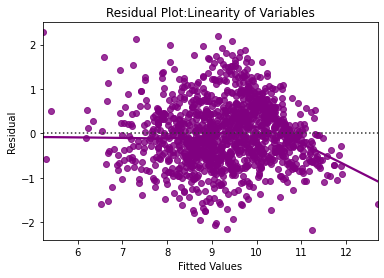

In [37]:
# predicted values
fitted = olsmodel3.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(fitted, residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual Plot:Linearity of Variables")
plt.show()

Assumptions 4 is satisfied by our olsmodel3. There is no pattern in the residual vs fitted values plot.

### Checking Assumption 5: Normality of error terms

The residuals should be normally distributed.

Text(0.5, 1.0, 'Normality of Error Terms')

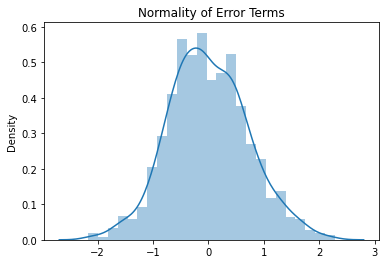

In [38]:
# Plot histogram of residuals
sns.distplot(residuals);
plt.title("Normality of Error Terms")

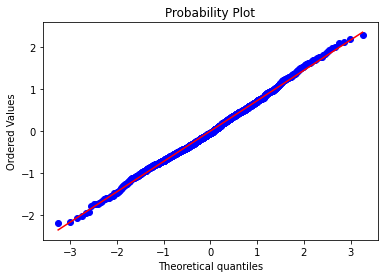

In [39]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

The residuals have a close to normal distribution. Assumption 5 is also satisfied. We should further investigate these values in the tails where we have made huge residual errors.

Now that we have seen that olsmodel3 follows all the linear regression assumptions. Let us use that model to draw inferences.

### Observations from the model
* Its clear from this model that Adequacy of social safety net programs (% of total welfare of beneficiary households), Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households) and Adjusted savings: mineral depletion (% of GNI) are the top features of importance.


## Add-on: Analyzing predictions where we were way off the mark

In [40]:
# Extracting the rows from original data frame df where indexes are same as the training data
original_df = countries_all_data[countries_all_data.index.isin(x_train.index.values)].copy()

# Extracting predicted values from the final model
residuals = olsmodel3.resid
fitted_values = olsmodel3.fittedvalues

# Add new columns for predicted values
original_df["Predicted gdp_log "] = fitted_values
original_df["Predicted Gdp"] = fitted_values.apply(math.exp)
original_df["residuals"] = residuals
original_df["Abs_residuals"] = residuals.apply(math.exp)
original_df["Difference in dollar"] = np.abs(
    original_df["GDP per capita (current US$)"] - original_df["Predicted Gdp"]
)

# Let us look at the top 20 predictions where our model made highest extimation errors (on train data)
original_df.sort_values(by=["Difference in dollar"], ascending=False).head(30)

,Country Name,Year,Actual employers’ social contributions_Extrabudgetary central government_Percent of GDP,Compensation of employees_General government_Percent of GDP,Consumption of fixed capital_Budgetary central government_Percent of GDP,Customs & other import duties_Extrabudgetary central government_Percent of GDP,Customs & other import duties_General government_Percent of GDP,D2 debt liabilities at market value _Extrabudgetary central government_Percent of GDP,D3 debt liabilities at market value _Extrabudgetary central government_Percent of GDP,Dividend expense_Budgetary central government_Percent of GDP,Dividend expense_Central government (excl. social security funds)_Percent of GDP,Dividend expense_Central government (incl. social security funds)_Percent of GDP,Dividend expense_General government_Percent of GDP,Employers' social contributions_Extrabudgetary central government_Percent of GDP,Expenditure (% of GDP),Expenditure on civil defense_Budgetary central government_Percent of GDP,Expenditure on civil defense_Central government (excl. social security funds)_Percent of GDP,Expenditure on civil defense_Central government (incl. social security funds)_Percent of GDP,Expenditure on civil defense_General government_Percent of GDP,Expenditure on communication_Budgetary central government_Percent of GDP,Expenditure on communication_Central government (excl. social security funds)_Percent of GDP,Expenditure on communication_Central government (incl. social security funds)_Percent of GDP,Expenditure on communication_General government_Percent of GDP,Expenditure on community development_Budgetary central government_Percent of GDP,Expenditure on community development_Central government (excl. social security funds)_Percent of GDP,Expenditure on community development_Central government (incl. social security funds)_Percent of GDP,Expenditure on community development_General government_Percent of GDP,Expenditure on education n.e.c._Budgetary central government_Percent of GDP,Expenditure on education n.e.c._Central government (excl. social security funds)_Percent of GDP,Expenditure on education n.e.c._Central government (incl. social security funds)_Percent of GDP,Expenditure on education n.e.c._General government_Percent of GDP,Expenditure on education not definable by level_Budgetary central government_Percent of GDP,Expenditure on education not definable by level_Central government (excl. social security funds)_Percent of GDP,Expenditure on education not definable by level_Central government (incl. social security funds)_Percent of GDP,Expenditure on education not definable by level_General government_Percent of GDP,Expenditure on environment protection_Central government (excl. social security funds)_Percent of GDP,Expenditure on environmental protection n.e.c._Budgetary central government_Percent of GDP,Expenditure on environmental protection n.e.c._Central government (excl. social security funds)_Percent of GDP,Expenditure on environmental protection n.e.c._Central government (incl. social security funds)_Percent of GDP,Expenditure on environmental protection n.e.c._General government_Percent of GDP,"Expenditure on exec/leg, fiscal, & external affairs_Budgetary central government_Percent of GDP","Expenditure on exec/leg, fiscal, & external affairs_Central government (excl. social security funds)_Percent of GDP","Expenditure on exec/leg, fiscal, & external affairs_Central government (incl. social security funds)_Percent of GDP","Expenditure on exec/leg, fiscal, & external affairs_General government_Percent of GDP",Expenditure on fuel & energy_Central government (excl. social security funds)_Percent of GDP,Expenditure on fuel & energy_Central government (incl. social security funds)_Percent of GDP,Expenditure on fuel & energy_General government_Percent of GDP,Expenditure on general services_Budgetary central government_Percent of GDP,Expenditure on general services_Central government (excl. social security funds)_Percent of GD

## Observation
* Its clear that our model is affected by countries that are so rich or have achieved richness in a short amount of time. 

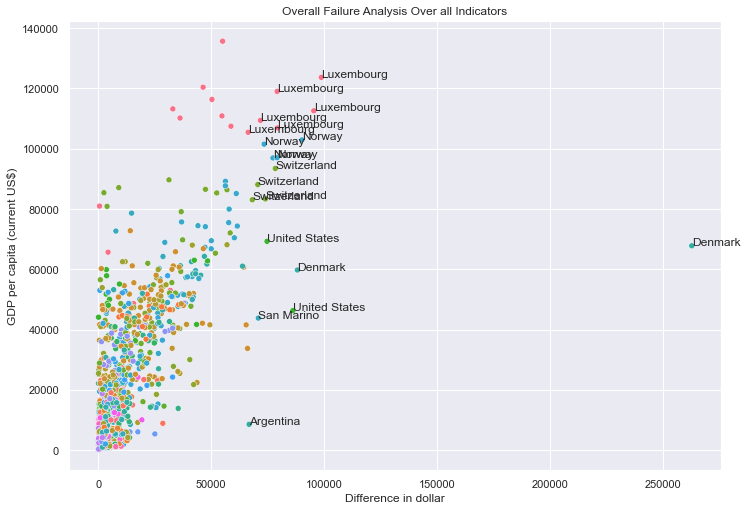

In [67]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(
    original_df["Difference in dollar"],
    original_df["GDP per capita (current US$)"],
    hue=original_df["Country Name"],legend = False
);
# Annotate label points
#Filter outliers
top_20 = original_df.nlargest(20, 'Difference in dollar')
for index, row in top_20.iterrows():
    plt.annotate(row['Country Name'], xy=(row['Difference in dollar'], row['GDP per capita (current US$)']), xytext=(row['Difference in dollar']+0.2, row['GDP per capita (current US$)']+0.2))
    plt.title("Overall Failure Analysis Over all Indicators")

Most feature outliers are the rich countries.

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#x_train = scaler.fit_transform(x_train)

#x_test = scaler.transform(x_test)
X_train = x_train[ind_vars_cols]
#X_train = scaler.fit_transform(X_train)
X_test = x_test[ind_vars_cols]
#X_test = scaler.transform(X_test)

In [43]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    """
    model : regressor to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)

    train_r2 = metrics.r2_score(y_train["GDP per capita (current US$)"], pred_train_)
    test_r2 = metrics.r2_score(y_test["GDP per capita (current US$)"], pred_test_)
    train_rmse = metrics.mean_squared_error(
        y_train["GDP per capita (current US$)"], pred_train_, squared=False
    )
    test_rmse = metrics.mean_squared_error(y_test["GDP per capita (current US$)"], pred_test_, squared=False)

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print(
            "R-sqaure on training set : ",
            metrics.r2_score(y_train["GDP per capita (current US$)"], pred_train_),
        )
        print("R-square on test set : ", metrics.r2_score(y_test["GDP per capita (current US$)"], pred_test_))
        print(
            "RMSE on training set : ",
            np.sqrt(metrics.mean_squared_error(y_train["GDP per capita (current US$)"], pred_train_)),
        )
        print(
            "RMSE on test set : ",
            np.sqrt(metrics.mean_squared_error(y_test["GDP per capita (current US$)"], pred_test_)),
        )

    # returning the list with train and test scores
    return score_list

### *Ridge Regression*

In [44]:
rdg = Ridge()
rdg.fit(X_train, y_train["GDP_log"])

Ridge()

In [45]:
Ridge_score = get_model_score(rdg)

R-sqaure on training set :  0.22147245616177713
R-square on test set :  0.3473286438712455
RMSE on training set :  19947.489037543502
RMSE on test set :  18192.841901097512


***Observation***

The results here are poor but the key observation is that there is no overfitting.

### Decision Tree

In [46]:
dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train["GDP_log"])
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  1.0
R-square on test set :  0.6369379267381768
RMSE on training set :  1.6476816882128173e-11
RMSE on test set :  13568.87090329294


#### Observations
* Decision Tree is overfitting on the training set and hence not able to generalize well on the test set.

In [47]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False))

                                                             Imp
Secure Internet servers (per 1 million people)      5.893510e-01
Borrowers from commercial banks (per 1,000 adults)  5.303965e-02
Bank nonperforming loans to total gross loans (%)   4.095746e-02
Fertilizer consumption (kilograms per hectare o...  3.810806e-02
Bank capital to assets ratio (%)                    3.588821e-02
Foreign direct investment, net (BoP, current US$)   2.805188e-02
Portfolio investment, net (BoP, current US$)        1.461968e-02
Immunization, HepB3 (% of one-year-old children)    1.025164e-02
Population living in slums (% of urban population)  9.085341e-03
Households and NPISHs Final consumption expendi...  8.659025e-03
Time to obtain an electrical connection (days)      8.423096e-03
Government expenditure per student, tertiary (%...  7.867112e-03
Net financial flows, RDB concessional (NFL, cur...  7.656929e-03
Real effective exchange rate index (2010 = 100)     7.629540e-03
Stocks traded, turnover r

#### Observations
* Secure Internet, Fertilizers and Bank capital are the top 3 important features of decision tree model.

### Random Forest


In [48]:
rf = RandomForestRegressor(random_state=1, oob_score=True)
rf.fit(X_train, y_train["GDP_log"])
RandomForest_model = get_model_score(rf)

R-sqaure on training set :  0.9628754358209716
R-square on test set :  0.7722017223313401
RMSE on training set :  4355.940370243215
RMSE on test set :  10748.02052035911


#### Observations
* Random Forest model has performed well on training and test set and we can see the model has overfitted slightly.

**Feature Importance**

In [49]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        rf.feature_importances_, columns=["Importance"], index=X_train.columns
    ).sort_values(by="Importance", ascending=False))

                                                      Importance
Secure Internet servers (per 1 million people)      5.754519e-01
Fertilizer consumption (kilograms per hectare o...  4.947399e-02
Borrowers from commercial banks (per 1,000 adults)  4.235278e-02
Bank capital to assets ratio (%)                    3.659296e-02
Foreign direct investment, net (BoP, current US$)   3.507589e-02
Bank nonperforming loans to total gross loans (%)   3.367166e-02
Households and NPISHs Final consumption expendi...  1.356393e-02
Population living in slums (% of urban population)  1.261014e-02
Adjusted savings: net forest depletion (% of GNI)   9.164379e-03
Portfolio investment, net (BoP, current US$)        7.948369e-03
Net incurrence of liabilities_General governmen...  7.001661e-03
Broad money to total reserves ratio                 6.448408e-03
Government expenditure per student, tertiary (%...  6.292213e-03
Stocks traded, turnover ratio of domestic share...  6.085433e-03
Time spent dealing with t

Does cross validation help ?

In [50]:
# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model using Sklearn Linear regression
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train['GDP_log'], cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train['GDP_log'], cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.585 (+/- 0.173)
Mean Squared Error: 0.662 (+/- 0.179)


### Hyperparameter Tuning - Decision Tree

In [51]:
# Choose the type of regressor.
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(2, 25, 5)) + [None],
    "min_samples_leaf": [1, 3, 5, 7],
    "max_leaf_nodes": [2, 5, 7] + [None],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train["GDP_log"])

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train["GDP_log"])

DecisionTreeRegressor(max_depth=12, min_samples_leaf=5, random_state=1)

In [52]:
dtree_tuned_score = get_model_score(dtree_tuned)

R-sqaure on training set :  0.9544951638668171
R-square on test set :  0.7034384840414283
RMSE on training set :  4822.586447277361
RMSE on test set :  12263.393542952452


#### Observations
* We see substantial improvement in decision tree by over 50% error reduction.

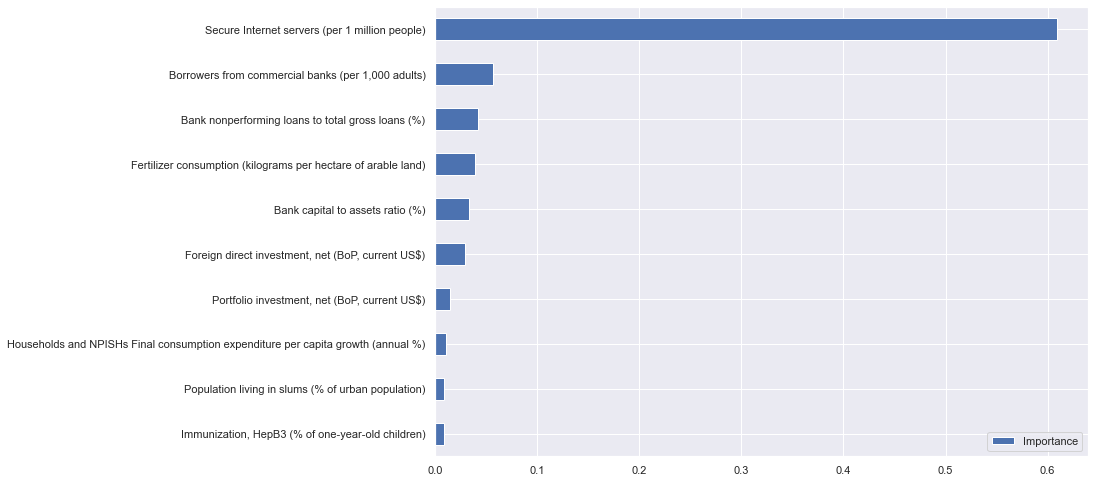

In [53]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

pd.DataFrame(dtree_tuned.feature_importances_, columns=["Importance"], index=X_train.columns).sort_values(by="Importance", ascending=False).head(10).plot(kind='barh');
plt.gca().invert_yaxis()


In [54]:
df = pd.DataFrame(dtree_tuned.feature_importances_, columns=["Importance"],\
                  index=X_train.columns).sort_values(by="Importance", ascending=False).head(10)
df

,Importance
Secure Internet servers (per 1 million people),0.608884
"Borrowers from commercial banks (per 1,000 adults)",0.056864
Bank nonperforming loans to total gross loans (%),0.042284
Fertilizer consumption (kilograms per hectare of arable land),0.039012
Bank capital to assets ratio (%),0.033683
"Foreign direct investment, net (BoP, current US$)",0.029226
"Portfolio investment, net (BoP, current US$)",0.014496
Households and NPISHs Final consumption expenditure per capita growth (annual %),0.010492
Population living in slums (% of urban population),0.008955
"Immunization, HepB3 (% of one-year-old children)",0.008896


#### Observations
* Secure Internet, Fertilizer consumption and Bank capital are the top 3 important features of decision tree model.

### Hyperparameter Tuning - Random Forest

In [55]:
# Choose the type of regressor
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [20, 30, 40],
    #"max_features": ["sqrt", "log2"],
    "n_estimators": [300, 400, 500],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train["GDP_log"])

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train["GDP_log"])

RandomForestRegressor(max_depth=30, n_estimators=500, random_state=1)

In [56]:
rf_tuned_score = get_model_score(rf_tuned)

R-sqaure on training set :  0.9672797516566857
R-square on test set :  0.7847507845889449
RMSE on training set :  4089.3995002245074
RMSE on test set :  10447.780922925882


#### Observations
* There's still scope for improvement with tuning the hyperparameters of the Random Forest.

**Feature Importance**

Text(0.5, 1.0, 'Feature Importance')

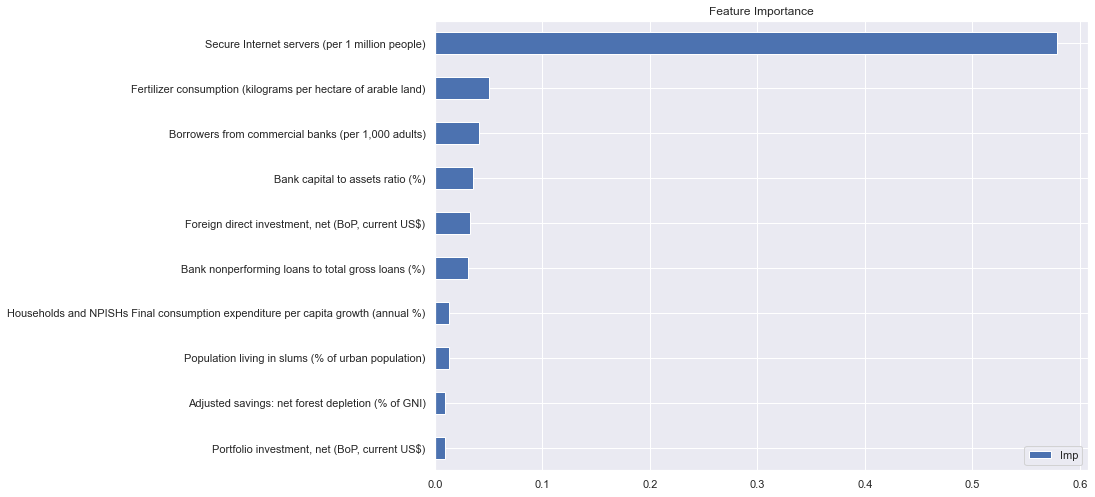

In [57]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Feature Importance")


In [58]:
# defining list of models
models = [rdg, dtree, dtree_tuned, rf, rf_tuned]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model, False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [59]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Ridge Regression",
            "Decision Tree",
            "Tuned Decision Tree",
            "Random Forest",
            "Tuned Random Forest",
        ],
        "Train_r2": r2_train,
        "Test_r2": r2_test,
        "Train_RMSE": rmse_train,
        "Test_RMSE": rmse_test,
    }
)
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Ridge Regression,0.221472,0.347329,1.994749e+04,18192.841901
1,Decision Tree,1.000000,0.636938,1.647682e-11,13568.870903
2,Tuned Decision Tree,0.954495,0.703438,4.822586e+03,12263.393543
3,Random Forest,0.962875,0.772202,4.355940e+03,10748.020520
4,Tuned Random Forest,0.967280,0.784751,4.089400e+03,10447.780923


* Ridge Regression and Linear Regression have performed relatively bad on the data. However, tuned Decision tree and Random forests have performed better on training and test set.There is a slight overfitting,if we can tune it better we can remove it.

In [60]:
X=X_train.values
y=y_train["GDP per capita (current US$)"].values.reshape(-1,1)
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(861, 117)
(861, 1)
(370, 117)
(370, 1)


In [61]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=len(ind_vars_cols), kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
44/44 [==============================] - 1s 1ms/step - loss: 0.9220
Epoch 2/50
44/44 [==============================] - 0s 1ms/step - loss: 0.8726
Epoch 3/50
44/44 [==============================] - 0s 1ms/step - loss: 0.6808
Epoch 4/50
44/44 [==============================] - 0s 1ms/step - loss: 0.4806
Epoch 5/50
44/44 [==============================] - 0s 3ms/ste

In [62]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12/12 [==============================] - 0s 1ms/step
5 Parameters: 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12/12 [==============================] - 0s 997us/step
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 60.093799845690675
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate th

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12/12 [==============================] - 0s 1ms/step
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 90.78342747503262
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the 

<AxesSubplot:xlabel='Parameters'>

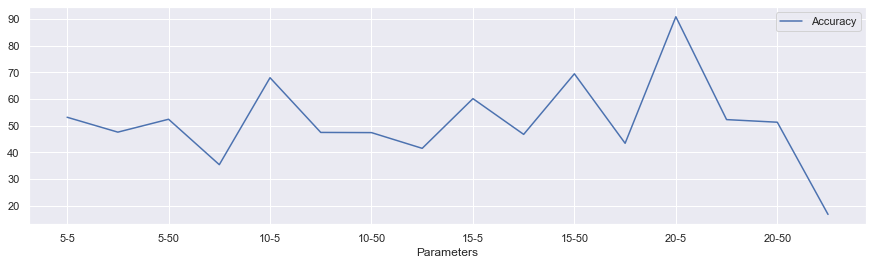

In [63]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [64]:
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=ind_vars_cols)
TestingData['GDP']=y_test_orig
TestingData['PredictedGDP']=Predictions
TestingData[['GDP','PredictedGDP' ]].head()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12/12 [==============================] - 0s 1ms/step


,GDP,PredictedGDP
0,8341.399679,3653.024414
1,41301.273220,20468.806641
2,50817.330825,17587.763672
3,42132.090722,37548.160156
4,72697.705986,68942.156250


In [65]:
# Computing the absolute percent error
APE=100*(abs(TestingData['GDP']-TestingData['PredictedGDP'])/TestingData['GDP'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: -59.57753703343812


,Dividend expense_Budgetary central government_Percent of GDP,Dividend expense_Central government (incl. social security funds)_Percent of GDP,Dividend expense_General government_Percent of GDP,Expense on NI & SGS: Current claims_State governments_Percent of GDP,"Expense on NI & SGS: Premiums, fees, & current claims_Central government (incl. social security funds)_Percent of GDP",Grants expense to int orgs: current_Extrabudgetary central government_Percent of GDP,Grants revenue from other gen govt: current_General government_Percent of GDP,Net acquisition of financial assets_Central government (excl. social security funds)_Percent of GDP_External_Other accounts receivable/payable (OAR/OAP),"Net acquisition of financial assets_External, Nonfinancial corporations, HHs, & NPISH_Budgetary central government_Percent of GDP",Net acquisition of financial assets_Social security funds_Percent of GDP_External_Debt securities,Net incurrence of liabilities_General government_Percent of GDP_External_Loans,"Net incurrence of liabilities_Social security funds_Percent of GDP_Domestic_Insurance, pension, & standardized guarantee schemes (IPSGS)","Net incurrence of liabilities_Social security funds_Percent of GDP_Total_Insurance, pension, & standardized guarantee schemes (IPSGS)",Social security benefits expense_State governments_Percent of GDP,Stock position liabilities_Social security funds_Percent of GDP_Total_Pension entitlements [GFS],ARI treatment (% of children under 5 taken to a health provider),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),Adjusted savings: mineral depletion (current US$),Adjusted savings: net forest depletion (% of GNI),Adjusted savings: net forest depletion (current US$),"Agriculture, forestry, and fishing, value added (annual % growth)",Antiretroviral therapy coverage (% of people living with HIV),Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV),Average transaction cost of sending remittances from a specific country (%),Average transaction cost of sending remittances to a specific country (%),Bank capital to assets ratio (%),Bank liquid reserves to bank assets ratio (%),Bank nonperforming loans to total gross loans (%),Battle-related deaths (number of people),Benefit incidence of social safety net programs to poorest quintile (% of total safety net benefits),Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits),"Borrowers from commercial banks (per 1,000 adults)",Broad money growth (annual %),Broad money to total reserves ratio,"Central government debt, total (% of GDP)",Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Claims on central government (annual growth as % of broad money),Coal rents (% of GDP),"Community health workers (per 1,000 people)","Condom use, population ages 15-24, male (% of males ages 15-24)",Consumption of iodized salt (% of households),Coverage of unemployment benefits and ALMP in poorest quintile (% of population),Coverage of unemployment benefits and ALMP in richest quintile (% of population),Deposit interest rate (%),"Depositors with commercial banks (per 1,000 adults)",Diarrhea treatment (% of children under 5 who received ORS packet),Disaster risk reduction progress score (1-5 scale; 5=best),Discrepancy in expenditure estimate of GDP (constant LCU),Electricity production from nuclear sources (% of total),Exclusive breastfeeding (% of children under 6 months),Exports of goods and services (annual % growth),Female genital mutilation prevalence (%),Fertilizer consumption (% of fertilizer production),Fertilizer consumption (kilograms per hectare of arable land),Firms that do not report all sales for tax purposes (% of firms),"Foreign direct investment, net (BoP, current US$)",General government final consumption expenditure (annual % growth),"Government expenditure per student, tertiary (% of GDP per capita)",Gross capital formation 

In [66]:
sum(abs(TestingData['GDP']-TestingData['PredictedGDP']))/sum(TestingData['GDP'])

0.5131644559533407

### Regression Analysis

- In this segment, we provide an empirical example of using partialling-out with Lasso to estimate the regression coefficient $β_1$ in the high-dimensional linear regression model:

- For any inference question, we can write Y as Y = $β_1D$ + $β^r_2W$ + ε.

- Specifically we are interested in how the rates at which economies of different countries grow, denoted by Y , are related to the initial wealth levels in each country, denoted by D, controlling for country’s institutional, educational, and other similar characteristics, denoted by W.

- The relationship is captured by the regression coefficient $β_1$.

- In this example, this coefficient is called the “speed of convergence/divergence”, as it measures the speed at which poor countries catch up ($β_1$<0) or fall ($β_1$>0) behind wealthy countries, controlling for W .

- Our inference question here is: **do poor countries grow faster than rich countries?** In other words, is the speed of convergence negative: $β_1$<0?
- This is the Convergence Hypothesis predicted by the Solow Growth Model